In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [7]:
from fastbook import *
from fastai.vision.widgets import *


In [8]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [9]:
dest= 'images/grizzly.jpg'
download_url(ims[0],dest,show_progress=False)

Path('images/grizzly.jpg')

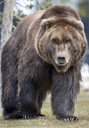

In [10]:
im = Image.open(dest)
im.to_thumb(128,128)

In [12]:
bear_types='grizzly', 'black', 'teddy'
path=Path('bears')


In [14]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg( f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [16]:
fns = get_image_files(path)
fns

(#0) []